In [625]:
import pandas as pd
import glob
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore", category=FutureWarning)

files = glob.glob('./server_results/grid_search/*.csv')
files = glob.glob('./server_results/grid_search_ext/*.csv')


In [626]:
# not used
def plot_grouped_bar_grouped(df, x, hue, group, y, datasetname):
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Combine hue and group into a single categorical column for better grouping
    df['combined_hue'] = df[hue].astype(str) + " | " + df[group].astype(str)

    # Plot the boxplot
    sns.boxplot(
        data=df,
        x=x,
        hue='combined_hue',  # Use the combined hue
        y=y,
        ax=ax,
        palette=sns.color_palette("Set2"),  # Use a better palette
    )

    # Set labels and title
    ax.set_xlabel(x.replace('_',' ').title(), fontsize=12)
    ax.set_ylabel(y.upper(), fontsize=12)
    ax.set_title(f'{y} Distribution for {x}, {hue}, and {group} in {datasetname}', fontsize=14)

    # Customize ticks
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Place legend at the bottom, without border
    ax.legend(
        title=f'{hue} | {group}',
        fontsize=12,
        title_fontsize=12,
        loc='lower center',
        bbox_to_anchor=(0.5, 1.05),  # Position legend outside plot
        ncol=3,  # Arrange legend in a single row
        frameon=False  # Remove legend border
    )

    # Adjust layout to ensure everything fits
    plt.tight_layout()
    plt.show()

In [627]:
def handle_matcher_names(df):

    

    substitutions = {
        'header_values_default': 'H+V def.',
        'header_values_simple': 'H+V simp.',
        'header_values_verbose': 'H+V ver.',
        'header_values_repeat': 'H+V rep.',
        'header_values_prefix': 'H+V pref.',
        'header_only': 'V only',
        'header_values_verbose_notype': 'H+V ver. notyp',
        'header_values_columnvaluepair_notype': 'H+V col-val notyp',
        'header_header_values_repeat_notype': 'H+V rep. notyp',
        'header_values_default_notype': 'H+V def. notyp',
    }

    # Replace encoding_mode values using the substitutions dictionary
    df['encoding_mode'] = df['encoding_mode'].replace(substitutions)

    # Capitalize 'sampling_mode' values
    df['sampling_mode'] = df['sampling_mode'].str.title()

    # Remove rows where encoding_mode is 'V only'
    # df = df[df['encoding_mode'] != 'V only']

    return df


    

def best_aggregate(df, metric='mrr'):

    df_grouped = df.groupby(['encoding_mode', 'sampling_mode', 'sampling_size'])[metric].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
    # df_grouped = df.groupby([ 'sampling_mode','encoding_mode', 'sampling_size'])[metric].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()

    df_grouped = df_grouped.sort_values(by='mean', ascending=False)

    print(df_grouped.head(20).to_string())
    return df_grouped





def plot_grouped_bar(df, x, hue, group, y, datasetname, figsize=(15, 5)):
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=figsize)

    print(datasetname)

    # df = df[df['sampling_mode'] == 'mixed']

    if group == 'sampling_size':
        df = df[df['sampling_size'] == 10]

    df = df[df['encoding_mode'] != 'V only']

    order = df.groupby(x)[y].mean().sort_values(ascending=False).index

    hue_order = df.groupby(hue)[y].mean().sort_values(ascending=False).index
    

    # Plot the boxplot
    sns.boxplot(
        data=df,
        x=x,
        hue=hue,
        y=y,
        ax=ax,
        palette=sns.color_palette("Set2"),  # Use a better palette
        order=order,
        hue_order=hue_order
        , showfliers=False

    )

    # Set labels and title
    ax.set_xlabel(x.replace('_',' ').title(), fontsize=12)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    ax.set_ylabel(y.upper(), fontsize=12)
    # ax.set_title(f'{y} Distribution for {x} and {hue} in {datasetname}', fontsize=14)#

    # Customize ticks
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Place legend at the bottom, without border
    ax.legend(
        title=hue.replace('_',' ').title(),
        fontsize=12,
        title_fontsize=12,
        loc='lower center',
        bbox_to_anchor=(0.5, 0.98),  # Position legend outside plot
        ncol=len(df[hue].unique()),  # Arrange legend in a single row
        frameon=False  # Remove legend border
    )

    # Remove the top and right spines
    sns.despine()

    # Save the figure as a high-resolution PDF
    fig.savefig("figures/grid_search_retriever_encmodes.pdf", format='pdf', dpi=300)

    # Adjust layout to ensure everything fits
    plt.tight_layout()
    plt.show()




In [628]:

all_dfs_list=[]
datasetnames =[]
for file in files:
    datasetname = file.split('_')[0]
    datasetname = file.split('/')[-1].split('_')[0]    
    datasetnames.append(datasetname)
    df = pd.read_csv(file)
    handle_matcher_names(df)
    all_dfs_list.append(df)

    if datasetname=='GDC':
        gdc_df = df

all_dfs = pd.concat(all_dfs_list)

    

In [629]:
# gdc_df_filtered = gdc_df[gdc_df['target_table'] == 'Huang.csv']
# gdc_df_filtered = gdc_df_filtered.sort_values(by='mrr', ascending=False)


# columns_to_select = [
#      'ncols_tgt', 'nrows_src', 'nrows_tgt', 'nmatches',
#     'encoding_mode', 'sampling_mode', 'sampling_size', 'runtime', 'mrr', 
#     'All_RecallAtSizeofGroundTruth'
# ]

# gdc_df_filtered_selected = gdc_df_filtered[columns_to_select]
# print(gdc_df_filtered_selected.head(20))


In [630]:
# for df in all_dfs_list:
#     best_aggregate(df)

In [631]:
# best_aggregate(all_dfs)

Results for Magellan
Magellan


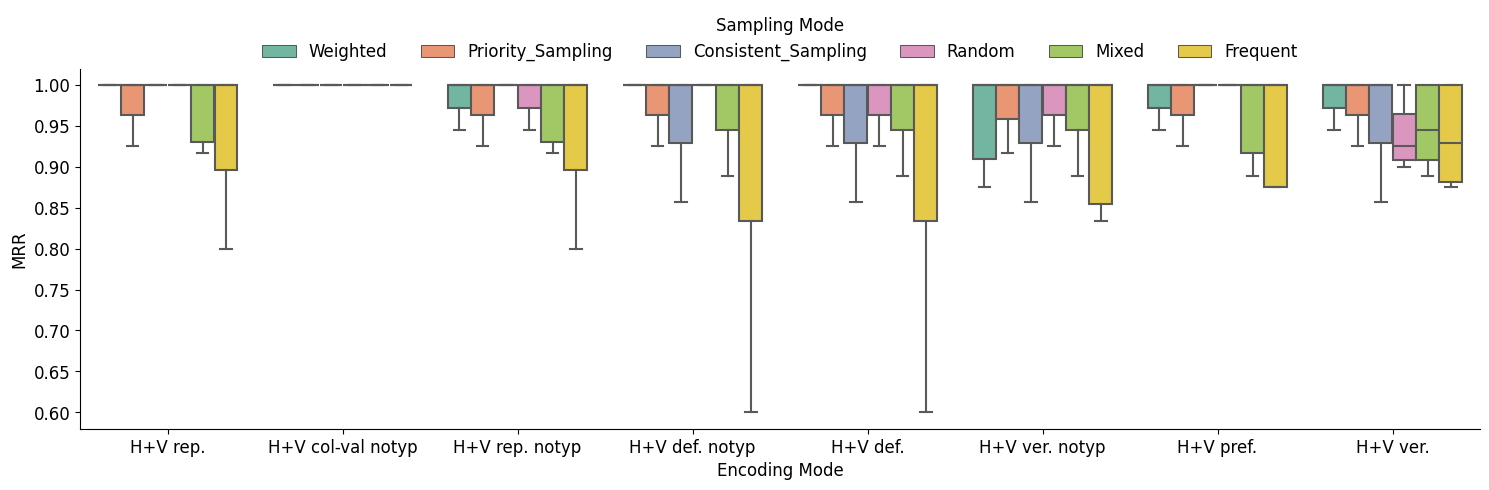

      encoding_mode        sampling_mode  sampling_size      mean  median       min  max       std
107          V only             Weighted             30  1.000000     1.0  1.000000  1.0  0.000000
102          V only    Priority_Sampling             10  1.000000     1.0  1.000000  1.0  0.000000
63   H+V rep. notyp             Frequent             30  1.000000     1.0  1.000000  1.0  0.000000
96           V only  Consistent_Sampling             10  1.000000     1.0  1.000000  1.0  0.000000
97           V only  Consistent_Sampling             30  1.000000     1.0  1.000000  1.0  0.000000
98           V only             Frequent             10  1.000000     1.0  1.000000  1.0  0.000000
15         H+V def.             Frequent             30  1.000000     1.0  1.000000  1.0  0.000000
99           V only             Frequent             30  1.000000     1.0  1.000000  1.0  0.000000
101          V only                Mixed             30  1.000000     1.0  1.000000  1.0  0.000000
100       

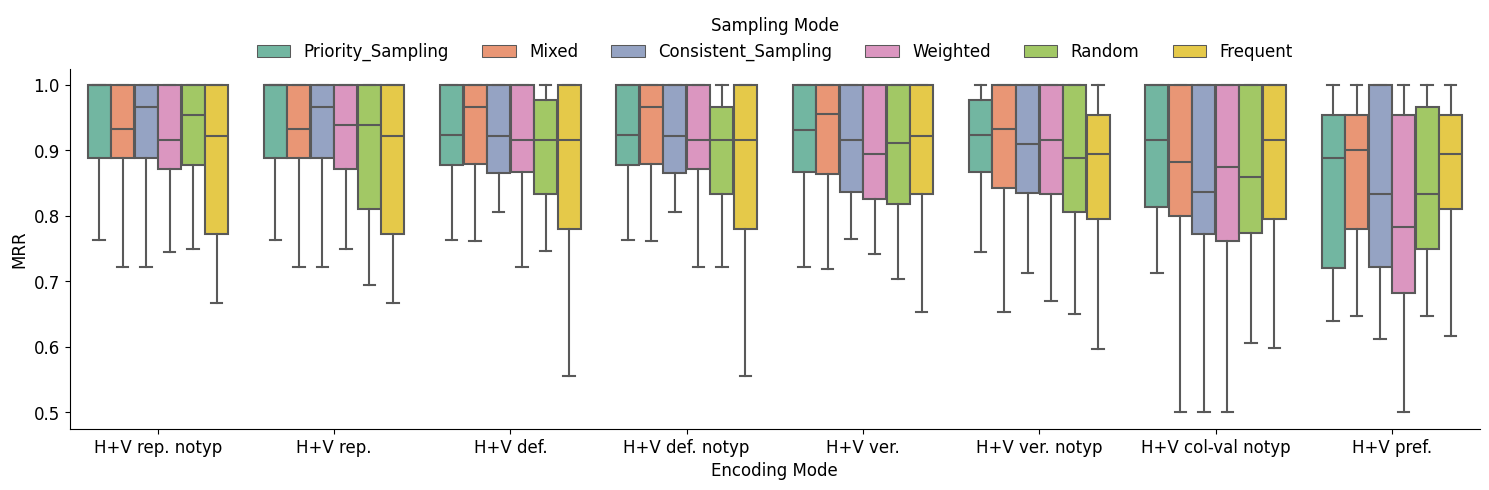

     encoding_mode        sampling_mode  sampling_size      mean    median       min  max       std
54        H+V rep.    Priority_Sampling             10  0.943767  1.000000  0.763889  1.0  0.069649
66  H+V rep. notyp    Priority_Sampling             10  0.943767  1.000000  0.763889  1.0  0.069649
49        H+V rep.  Consistent_Sampling             30  0.937856  0.966667  0.722222  1.0  0.076521
61  H+V rep. notyp  Consistent_Sampling             30  0.937856  0.966667  0.722222  1.0  0.076521
48        H+V rep.  Consistent_Sampling             10  0.937348  0.966667  0.722222  1.0  0.076754
60  H+V rep. notyp  Consistent_Sampling             10  0.937348  0.966667  0.722222  1.0  0.076754
68  H+V rep. notyp               Random             10  0.930925  0.954545  0.750000  1.0  0.080030
58        H+V rep.             Weighted             10  0.930066  0.939394  0.750000  1.0  0.073125
59        H+V rep.             Weighted             30  0.929305  0.954545  0.755556  1.0  0.067800


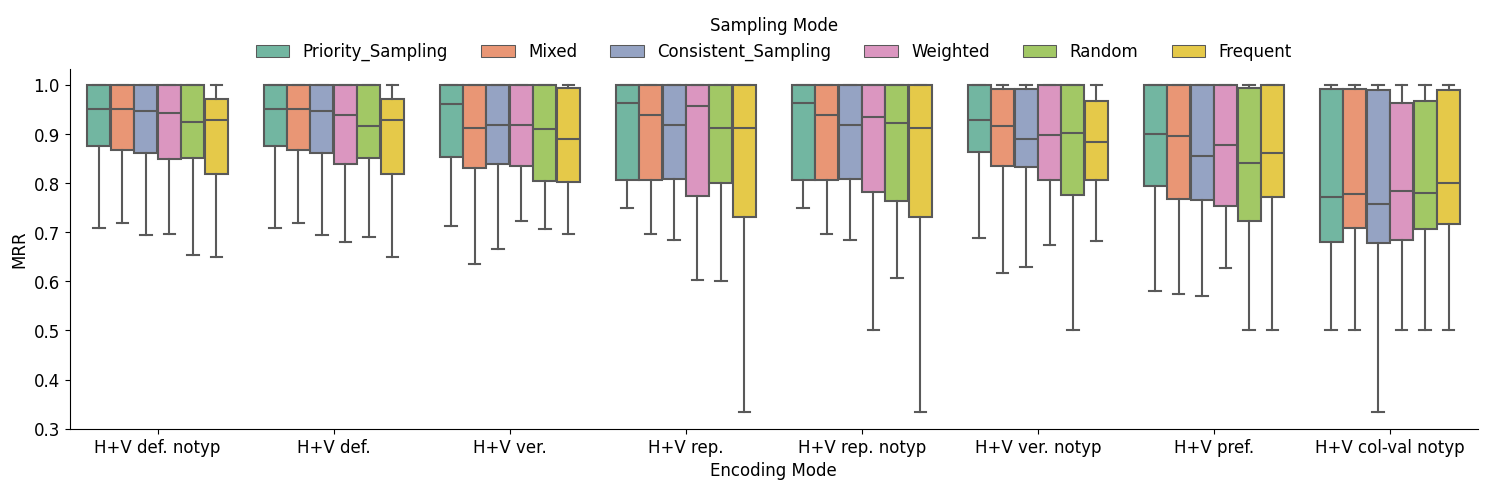

     encoding_mode        sampling_mode  sampling_size      mean    median       min  max       std
78        H+V ver.    Priority_Sampling             10  0.927779  0.961648  0.712121  1.0  0.081550
18        H+V def.    Priority_Sampling             10  0.922945  0.951910  0.672727  1.0  0.096177
30  H+V def. notyp    Priority_Sampling             10  0.922945  0.951910  0.672727  1.0  0.096177
28  H+V def. notyp                Mixed             10  0.920165  0.950487  0.610101  1.0  0.097477
16        H+V def.                Mixed             10  0.920165  0.950487  0.610101  1.0  0.097477
90  H+V ver. notyp    Priority_Sampling             10  0.916110  0.927763  0.687879  1.0  0.088671
24  H+V def. notyp  Consistent_Sampling             10  0.914867  0.946970  0.693939  1.0  0.090250
12        H+V def.  Consistent_Sampling             10  0.914867  0.946970  0.693939  1.0  0.090250
66  H+V rep. notyp    Priority_Sampling             10  0.909693  0.962862  0.750000  1.0  0.099398


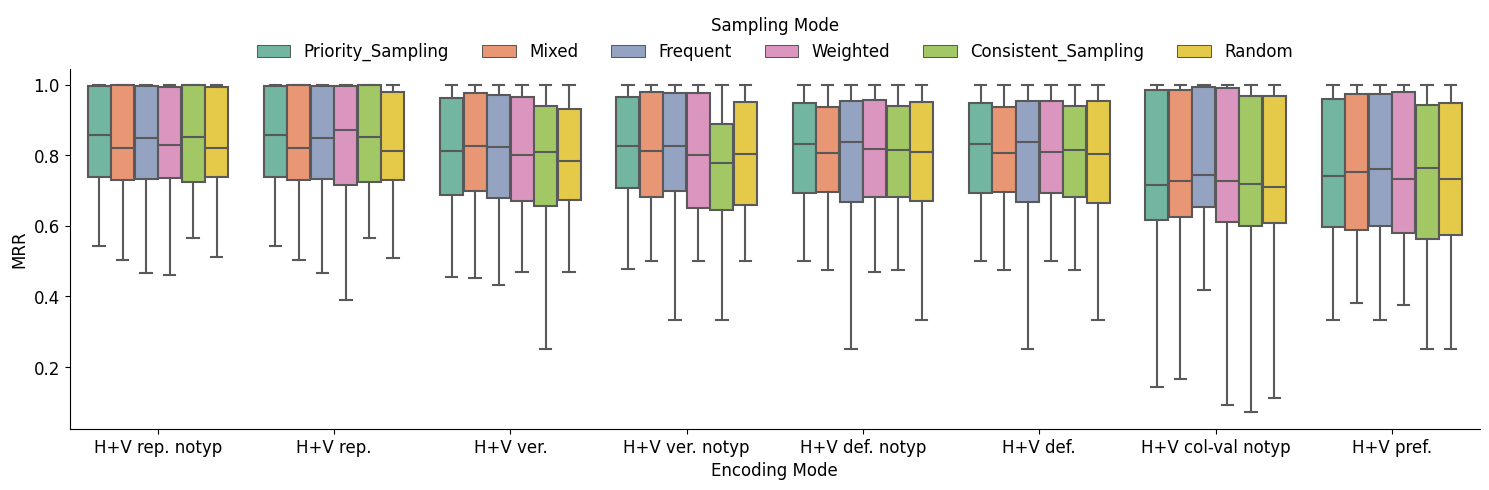

     encoding_mode        sampling_mode  sampling_size      mean    median       min  max       std
69  H+V rep. notyp               Random             30  0.851538  0.843651  0.535556  1.0  0.137935
49        H+V rep.  Consistent_Sampling             30  0.846593  0.836000  0.500000  1.0  0.144803
61  H+V rep. notyp  Consistent_Sampling             30  0.846593  0.836000  0.500000  1.0  0.144803
66  H+V rep. notyp    Priority_Sampling             10  0.842760  0.858946  0.542444  1.0  0.145654
54        H+V rep.    Priority_Sampling             10  0.842760  0.858946  0.542444  1.0  0.145654
57        H+V rep.               Random             30  0.841609  0.850000  0.500000  1.0  0.147967
67  H+V rep. notyp    Priority_Sampling             30  0.836273  0.837261  0.500000  1.0  0.159392
55        H+V rep.    Priority_Sampling             30  0.836273  0.837261  0.500000  1.0  0.159392
60  H+V rep. notyp  Consistent_Sampling             10  0.834680  0.852667  0.564561  1.0  0.144571


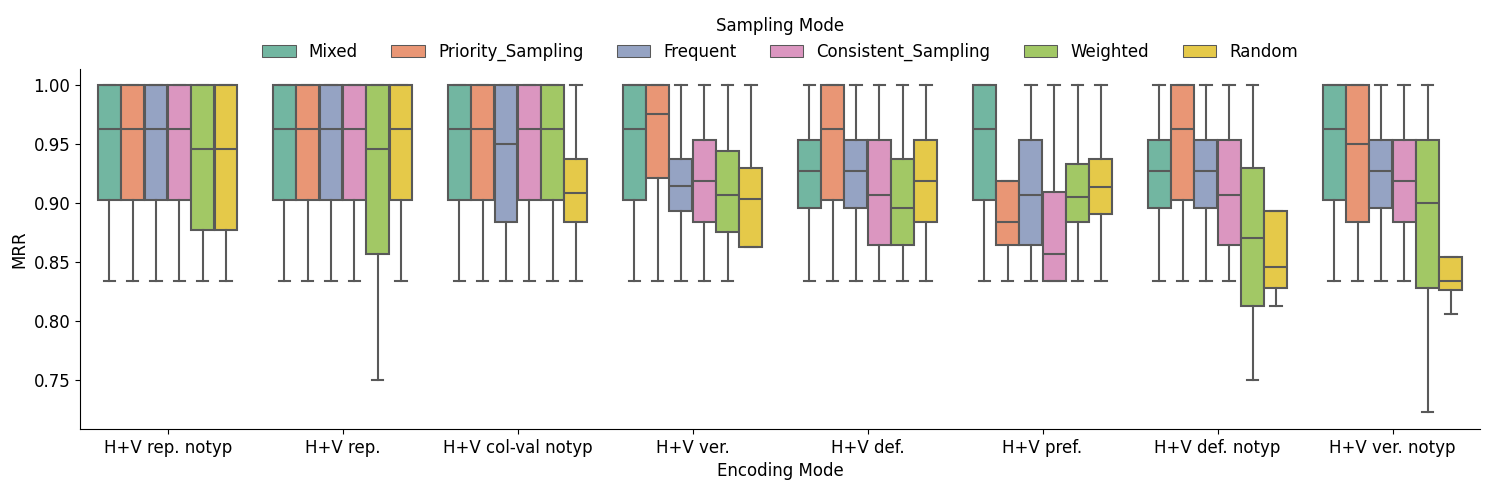

        encoding_mode        sampling_mode  sampling_size      mean  median       min  max       std
61     H+V rep. notyp  Consistent_Sampling             30  0.945833  0.9750  0.833333  1.0  0.078617
25     H+V def. notyp  Consistent_Sampling             30  0.945833  0.9750  0.833333  1.0  0.078617
78           H+V ver.    Priority_Sampling             10  0.945833  0.9750  0.833333  1.0  0.078617
53           H+V rep.                Mixed             30  0.945833  0.9750  0.833333  1.0  0.078617
49           H+V rep.  Consistent_Sampling             30  0.945833  0.9750  0.833333  1.0  0.078617
13           H+V def.  Consistent_Sampling             30  0.945833  0.9750  0.833333  1.0  0.078617
65     H+V rep. notyp                Mixed             30  0.945833  0.9750  0.833333  1.0  0.078617
56           H+V rep.               Random             10  0.939583  0.9625  0.833333  1.0  0.079167
55           H+V rep.    Priority_Sampling             30  0.939583  0.9625  0.833333  1.0 

In [623]:
for i,df in enumerate(all_dfs_list):
    datasetname =datasetnames[i]
    print('Results for', datasetname)
    plot_grouped_bar(df, 'encoding_mode', 'sampling_mode',
                     'sampling_size', 'mrr', datasetname)
    # plot_grouped_bar(df,  'sampling_mode','encoding_mode',
    #                  'sampling_size', 'mrr', datasetname)
    best_aggregate(df)

All datasets


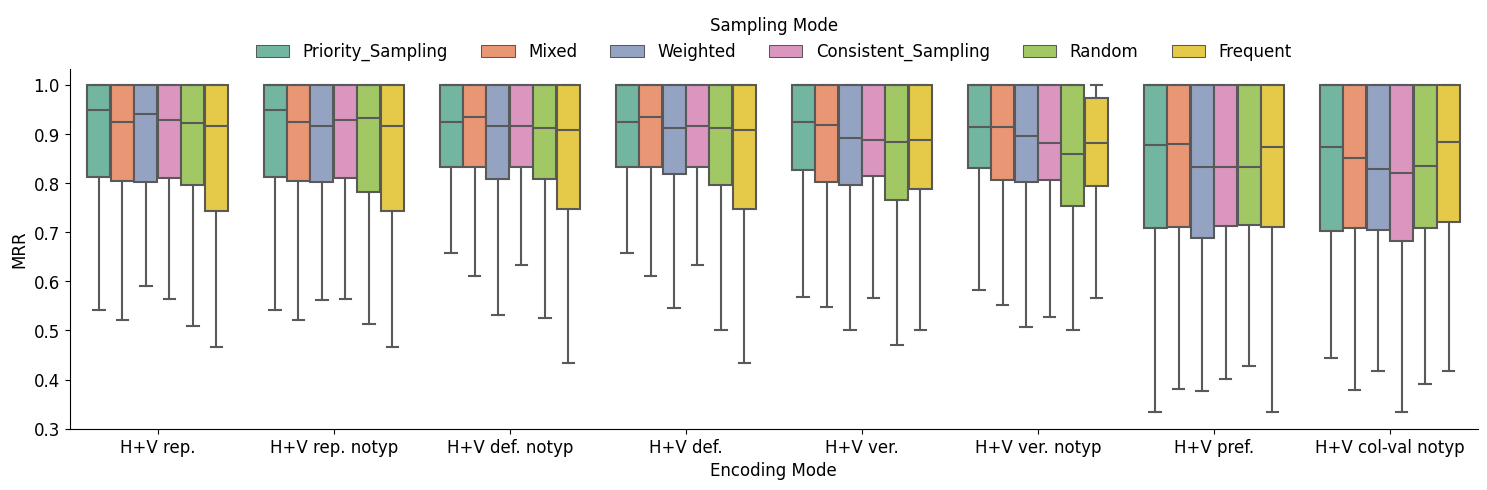

     encoding_mode        sampling_mode  sampling_size      mean    median       min  max       std
54        H+V rep.    Priority_Sampling             10  0.903678  0.948701  0.542444  1.0  0.114033
66  H+V rep. notyp    Priority_Sampling             10  0.903678  0.948701  0.542444  1.0  0.114033
60  H+V rep. notyp  Consistent_Sampling             10  0.897377  0.929454  0.564561  1.0  0.117602
48        H+V rep.  Consistent_Sampling             10  0.897377  0.929454  0.564561  1.0  0.117602
55        H+V rep.    Priority_Sampling             30  0.896997  0.926042  0.500000  1.0  0.119551
67  H+V rep. notyp    Priority_Sampling             30  0.896997  0.926042  0.500000  1.0  0.119551
61  H+V rep. notyp  Consistent_Sampling             30  0.896518  0.930952  0.500000  1.0  0.116085
49        H+V rep.  Consistent_Sampling             30  0.896518  0.930952  0.500000  1.0  0.116085
52        H+V rep.                Mixed             10  0.892422  0.923611  0.502603  1.0  0.121134


,encoding_mode,sampling_mode,sampling_size,mean,median,min,max,std
54,H+V rep.,Priority_Sampling,10,0.903678,0.948701,0.542444,1.0,0.114033
66,H+V rep. notyp,Priority_Sampling,10,0.903678,0.948701,0.542444,1.0,0.114033
60,H+V rep. notyp,Consistent_Sampling,10,0.897377,0.929454,0.564561,1.0,0.117602
48,H+V rep.,Consistent_Sampling,10,0.897377,0.929454,0.564561,1.0,0.117602
55,H+V rep.,Priority_Sampling,30,0.896997,0.926042,0.500000,1.0,0.119551
...,...,...,...,...,...,...,...,...
103,V only,Priority_Sampling,30,0.529292,0.350549,0.000000,1.0,0.395644
104,V only,Random,10,0.529292,0.350549,0.000000,1.0,0.395644
105,V only,Random,30,0.529292,0.350549,0.000000,1.0,0.395644
106,V only,Weighted,10,0.529292,0.350549,0.000000,1.0,0.395644


In [624]:
metric = 'All_RecallAtSizeofGroundTruth'
metric= 'mrr'
plot_grouped_bar(all_dfs,  'encoding_mode','sampling_mode',  'sampling_size', metric,'All datasets')
best_aggregate(all_dfs)